In [3]:
from IPython.display import display

import os
os.chdir('C:/Users/Guy/Desktop/NewGridBot/')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.set(rc={'figure.figsize':(30,10)})
from sklearn.cluster import KMeans
data = pd.read_pickle('data/data_btc_eth_ltc.pkl')
data = data.loc['ETH/USD'].close.to_numpy()

<Figure size 432x288 with 0 Axes>

In [11]:
import numpy as np
import pandas as pd

class SupportResistance():
    
    def set_histogram(self, data):
        histogram = np.histogram(data, bins=self.nb_bins)
        return histogram[0], [[histogram[1][i], histogram[1][i+1]] for i in range(len(histogram[1])-1)]
    
    def denoise(self, hist_count):
        noise = self.divider // 10
        return np.array([0 if value <= noise else value for value in hist_count])
    
    def set_clusters_edge(self):
        self.hist_count_denoise[0] = 0
        clusters_index = []
        for i in range(1, len(self.hist_count_denoise)):
            if self.hist_count_denoise[i]:
                if not self.hist_count_denoise[i-1]:
                    clusters_index.append([])
                clusters_index[-1].append(i)
        clusters_edge_index = [[clusters_index[i][0], clusters_index[i][-1]] for i in range(len(clusters_index)) if len(clusters_index[i]) > self.nb_bins // 20]
        return np.array([[self.hist_edge[i[0]][0], self.hist_edge[i[1]][1]] for i in clusters_edge_index])
    
    def set_centroids(self):
        return np.array([arr.mean() for arr in self.clusters_edge])
    
    def kmeans_algorithm(self, data, centroids):
        clusters_variance = np.array([np.abs(data - value) for value in centroids])
        return np.array([value.argmin() for value in clusters_variance.T])
    
    def set_support_resistance(self, data):
        return np.array([[data[np.where(self.clusters_labels == c_l)].min(), data[np.where(self.clusters_labels == c_l)].max()] for c_l in np.unique(self.clusters_labels)])
    
    def get_limits(self, last_data):
        for s_r in self.support_resistance:
            if s_r[0] <= last_data <= s_r[1]:
                return s_r
    
    def __init__(self, data):
        self.divider = 1000
        self.nb_bins = data.size // self.divider
        
        self.hist_count, self.hist_edge = self.set_histogram(data)
        self.hist_count_denoise = self.denoise(self.hist_count)
        
        self.clusters_edge = self.set_clusters_edge()
        self.centroids = self.set_centroids()
        self.clusters_labels = self.kmeans_algorithm(data, self.centroids)
        
        self.support_resistance = self.set_support_resistance(data)

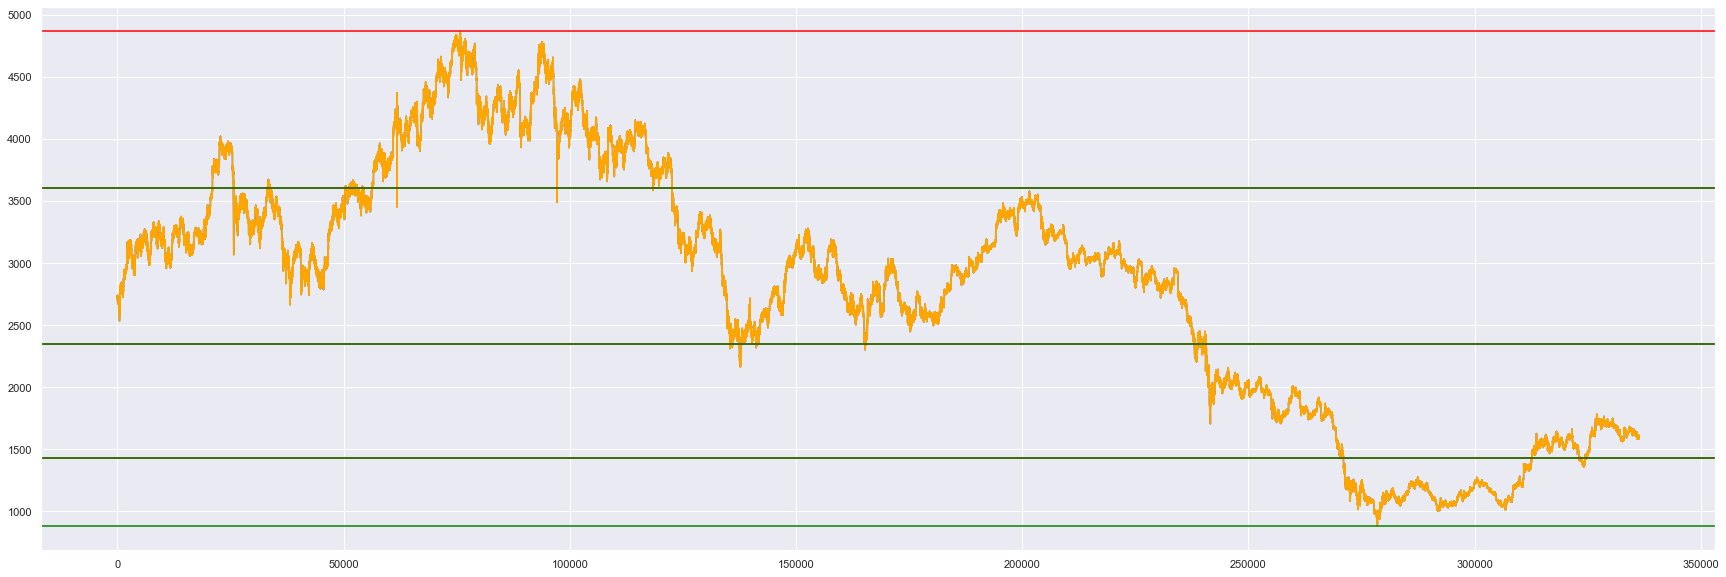

In [31]:
sub_data = data[:]
fig = sns.lineplot(data=data)
sns.lineplot(data=sub_data, color="orange")
for val in SupportResistance(sub_data).support_resistance:
    fig.axhline(y=val[0], color="green")
    fig.axhline(y=val[1], color="red")

336

100

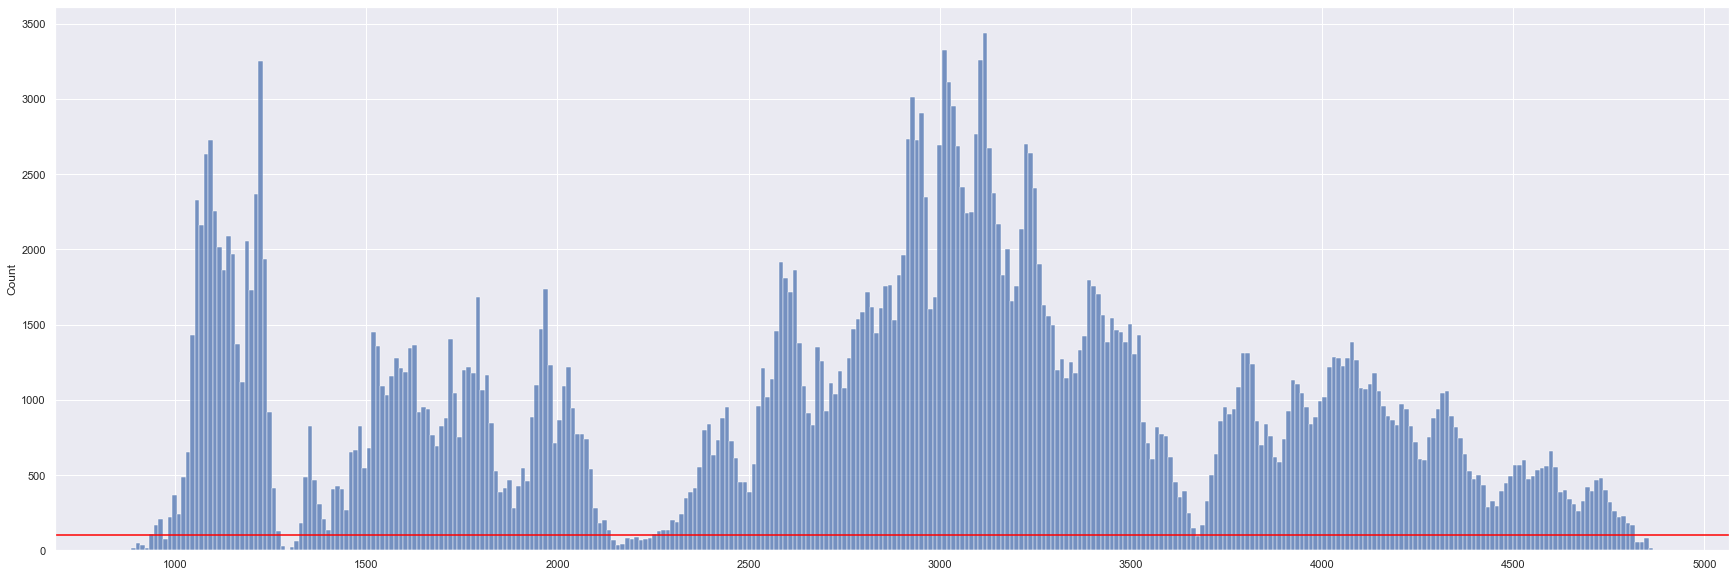

In [3]:
nb_bins = sub_data.size//1000
noise = 1000//10
display(nb_bins, noise)
fig = sns.histplot(data=sub_data, bins=nb_bins)
fig.axhline(y=noise, color="red")

In [4]:
hist = np.histogram(sub_data, bins=nb_bins)
count = hist[0]
edge = [[hist[1][i], hist[1][i+1]] for i in range(len(hist[1])-1)]

count = np.array([0 if val <= noise else val for val in count])
    
#count = np.append(count[nb_bins//25:], np.array([np.nan]*(nb_bins//25)))
#count[np.where(count.round(0) == 0)] = np.nan

<AxesSubplot:>

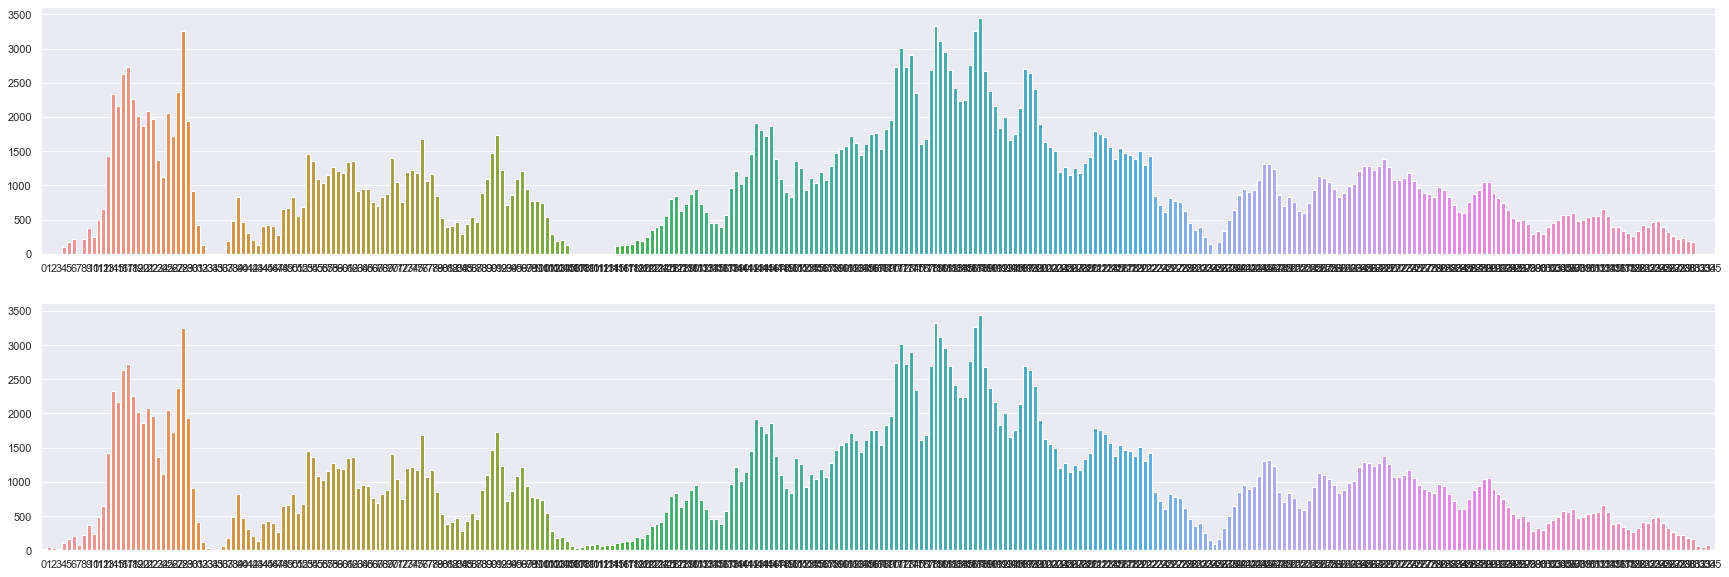

In [5]:
plt.subplot(2,1,1)
sns.barplot(y=count, x=np.arange(count.size))
plt.subplot(2,1,2)
sns.barplot(y=np.histogram(sub_data, bins=nb_bins)[0], x=np.arange(nb_bins))

In [6]:
count[0] = 0
cluster_index = []
for i in range(1, len(count)):
    if count[i]:
        if not count[i-1]:
            cluster_index.append([])
        cluster_index[-1].append(i)
cluster_edge_index = [[cluster_index[i][0], cluster_index[i][-1]] for i in range(len(cluster_index)) if len(cluster_index[i]) > nb_bins//20]
cluster_edge = np.array([[edge[i[0]][0], edge[i[1]][1]] for i in cluster_edge_index])

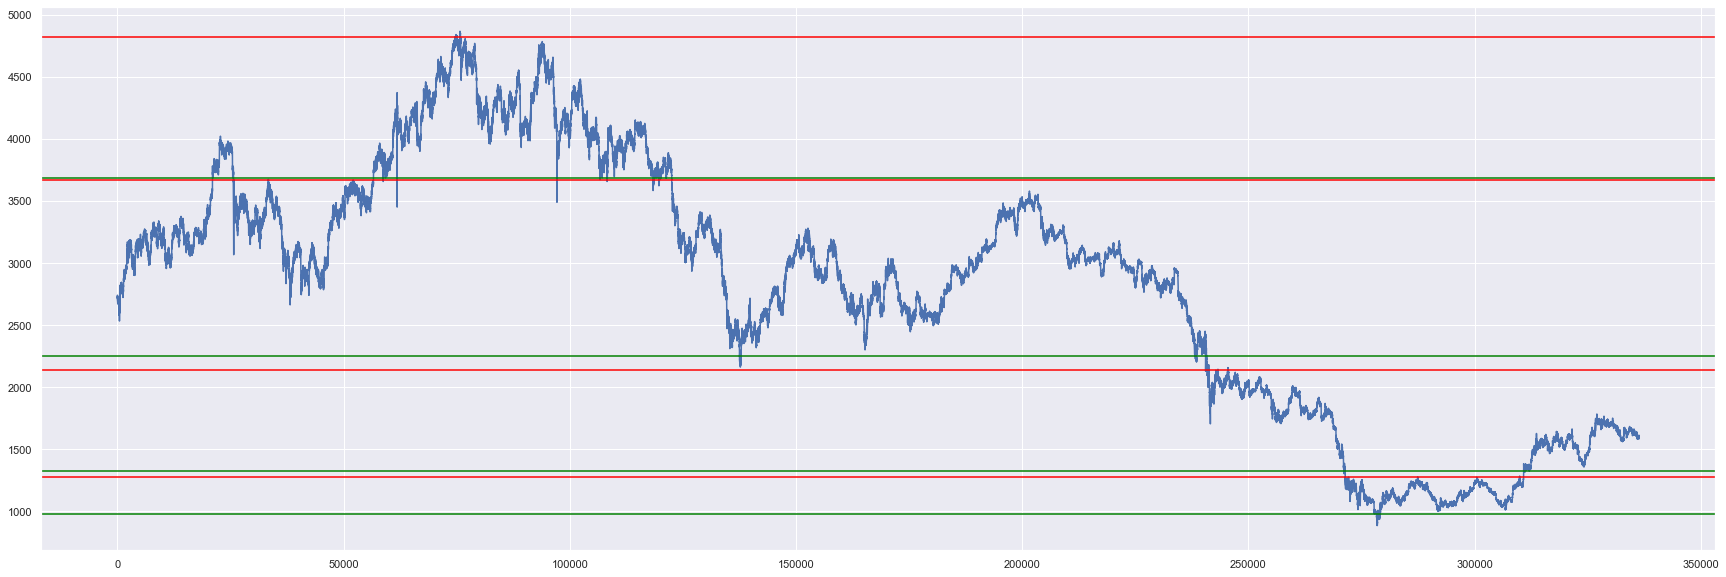

In [7]:
fig = sns.lineplot(data=sub_data)
for value in cluster_edge:
    fig.axhline(y=value[0], color="green")
    fig.axhline(y=value[1], color="red")

In [8]:
centroids = np.array([arr.mean() for arr in cluster_edge])
clusters_variance = np.array([np.abs(sub_data - value) for value in centroids])
clusters_labels = np.array([value.argmin() for value in clusters_variance.T])

<AxesSubplot:ylabel='data'>

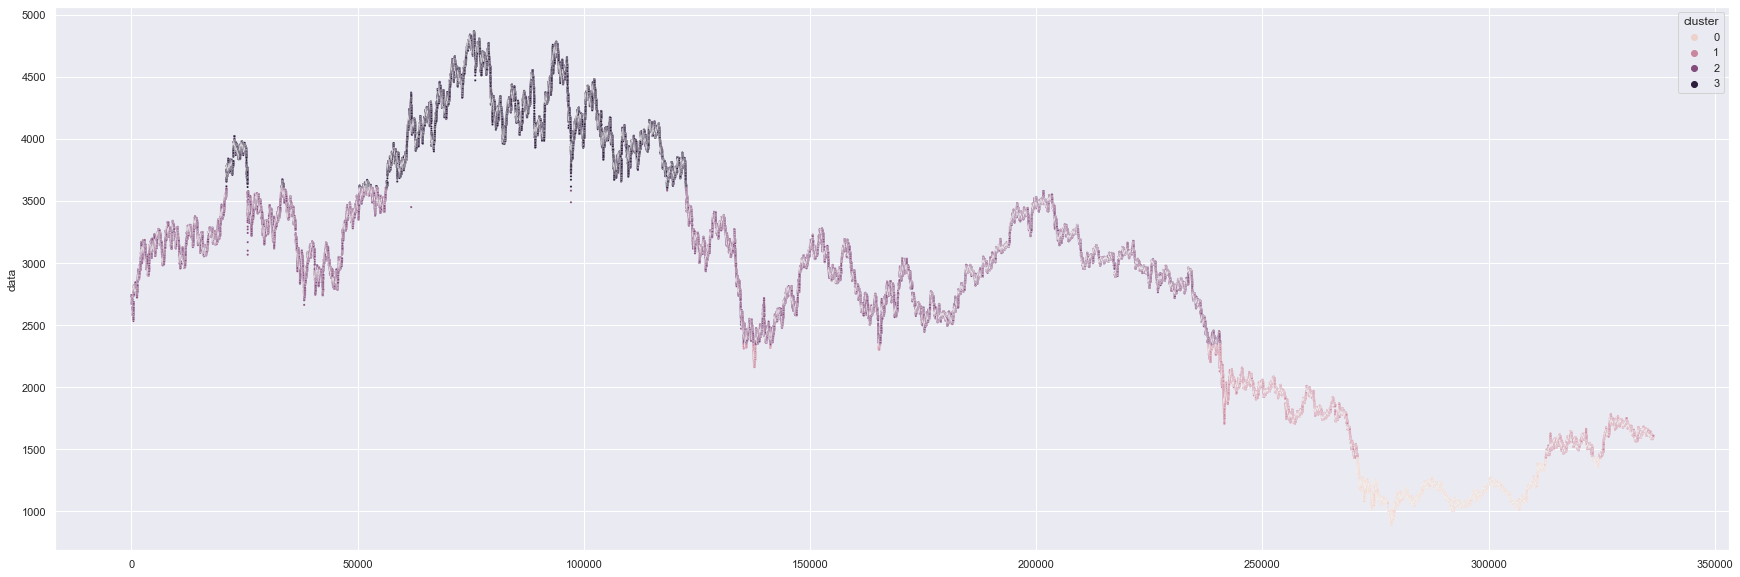

In [9]:
cluster = pd.DataFrame({
    "data": sub_data,
    "cluster": clusters_labels
})
sns.scatterplot(data=cluster, y="data", x=cluster.index, hue="cluster", s=5)

In [12]:
sub_data

array([2727.7, 2719.4, 2716.6, ..., 1607.6, 1608.2, 1608.1])

In [11]:
clusters_labels

array([2, 2, 2, ..., 1, 1, 1], dtype=int64)

In [23]:
sub_data[np.where(clusters_labels == 1)].min()

1430.2

In [34]:
s_r = np.array([[sub_data[np.where(clusters_labels == c_l)].min(), sub_data[np.where(clusters_labels == c_l)].max()] for c_l in np.unique(clusters_labels)])

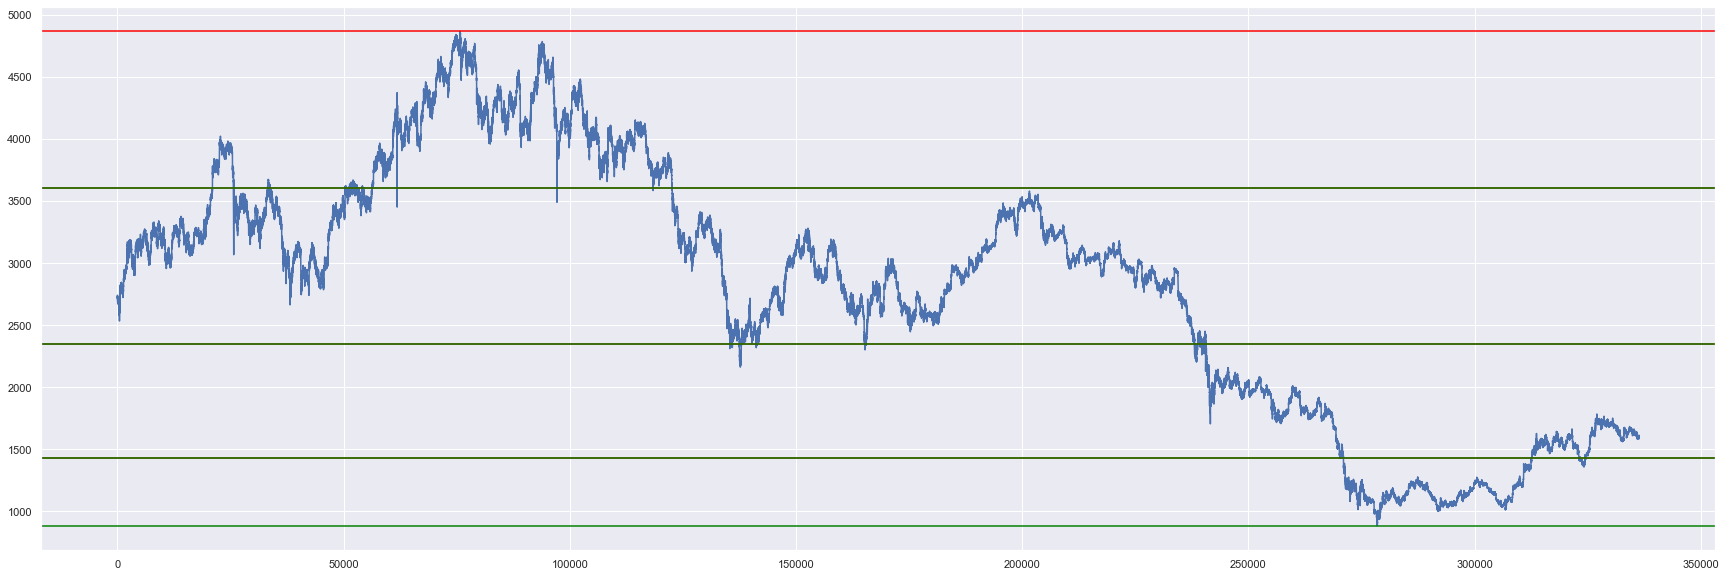

In [28]:
fig = sns.lineplot(data=sub_data)
for val in s_r:
    fig.axhline(y=val[0], color="green")
    fig.axhline(y=val[1], color="red")

In [31]:
last_data = 1500

In [46]:
last_data <= s_r.flatten() <= last_data

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()